In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

df = pd.read_csv("1-CombinedDataset.csv", index_col=0)

df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index
0,2014-01-01,1440,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918
...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620


In [2]:
def janToNaN(date):
    if date[5:7] == '01':
        return None
    else:
        return date
    
df['DATE'] = df['DATE'].apply(lambda x: janToNaN(x))

df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index
0,None,1440,8.2,2.858095,0.071613,1.92538,1.34214,4.4320,1.07487,235.288
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918
...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620


In [3]:
df = df[df['DATE'].notnull()]

In [4]:
df

,DATE,FORECLOSURE,CAUR,Average DGS,DFF,NASDAQCOM,ZHVI,MORT30US,BofA_Yield_Index_PCH,CA_Consumer_Price_Index
1,2014-02-01,524,8.1,2.709474,0.066429,1.08537,1.13758,4.3025,0.87364,235.547
2,2014-03-01,611,8.0,2.723333,0.078065,1.83138,0.60021,4.3425,1.04621,236.028
3,2014-04-01,328,7.8,2.705238,0.090333,-3.67258,0.22288,4.3375,0.66026,236.468
4,2014-05-01,503,7.7,2.559048,0.087097,0.39007,0.08087,4.1920,0.88867,236.918
5,2014-06-01,439,7.6,2.598571,0.095667,4.77259,0.13118,4.1625,0.99437,237.231
...,...,...,...,...,...,...,...,...,...,...
100,2022-05-01,170,4.3,2.898095,0.765484,-11.67996,1.39058,5.2300,-3.22395,291.474
101,2022-06-01,196,4.2,3.143333,1.205000,-3.47270,0.29177,5.5220,-2.03930,295.328
102,2022-07-01,147,3.9,2.896000,1.675806,1.78399,-0.40032,5.4125,-0.40364,295.271
103,2022-08-01,214,4.1,2.897826,2.330000,8.15331,-1.15309,5.2225,3.38678,295.620


In [5]:
df['DATE'] = pd.to_datetime(df['DATE'])    
df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')
feature_labels =['DATE_DELTA','CAUR', 'Average DGS', 'DFF', 'NASDAQCOM' ,'ZHVI','BofA_Yield_Index_PCH','CA_Consumer_Price_Index','MORT30US']
X = df[feature_labels]
y = df[['FORECLOSURE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

C:\Users\wangx\AppData\Local\Temp\ipykernel_14332\676130633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])
C:\Users\wangx\AppData\Local\Temp\ipykernel_14332\676130633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE_DELTA'] = (df['DATE'] - df['DATE'].min())  / np.timedelta64(1,'D')


In [6]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 9)
regressor.fit(X_train,y_train)

C:\Users\wangx\AppData\Local\Temp\ipykernel_14332\969330273.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X_train,y_train)


RandomForestRegressor(random_state=9)

In [7]:
y_pred = regressor.predict(X_test)

In [8]:
r2_score(y_test,y_pred)

0.6224956071089018

---

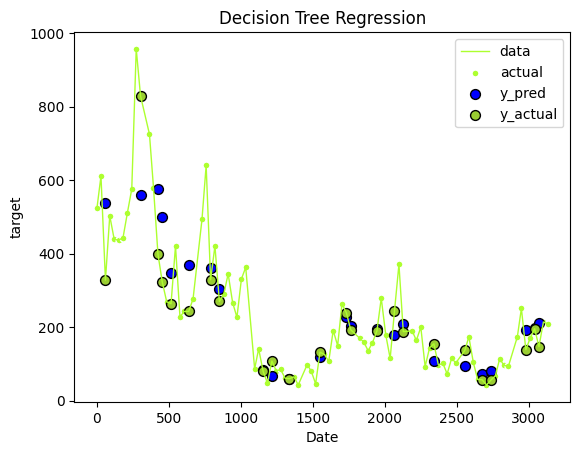

In [9]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure()
plt.plot(X['DATE_DELTA'], y, color="greenyellow", lw=1, label="data")
plt.scatter(X['DATE_DELTA'], y,s=25, edgecolor="white", c="greenyellow", label="actual")
plt.scatter(X_test['DATE_DELTA'], y_pred,s=50, edgecolor="black", c="blue", label="y_pred")
plt.scatter(X_test['DATE_DELTA'], y_test, s=50, edgecolor="black", c="yellowgreen", label="y_actual")

plt.xlabel("Date")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()